<a href="https://colab.research.google.com/github/Gabriel-Groehs/Machine_Learning/blob/main/Projeto_2_Previs%C3%A3o_de_Lucros_(sorvetes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema

- Base de dados:
  - Input (X): Temperatura
  - Output (Y): Lucro diário em dólares 

# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.9.2'

# Etapa 2: Importação da base de dados

In [ ]:
sales_df = pd.read_csv('SalesData.csv')

In [ ]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
sales_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Etapa 3: Visualização da base de dados

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


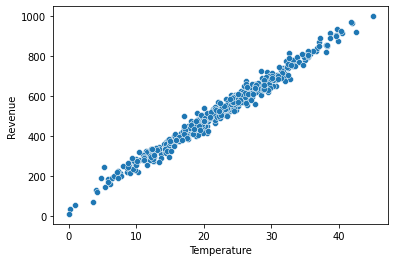

In [ ]:
sns.scatterplot(sales_df['Temperature'], sales_df['Revenue']);

# Etapa 4: Criação das variáveis da base de dados

In [ ]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [ ]:
X_train.shape

(500,)

In [ ]:
y_train.shape

(500,)

# Etapa 5: Criação e construção do modelo

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))
model.add(tf.keras.layers.Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 3s 2ms/step - loss: 156357.4375
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 13128.4346
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 4110.8975
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 1217.8228
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 764.4772
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 696.2467
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 688.0786
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 675.7958
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 668.7528
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 674.8486
Epoch 11/1000
16/16 [==============================] - 0s 2ms/step - loss: 676.8774
Epoch 12/1000
16/16 [==============================] - 0s 2ms/step - loss: 690

# Etapa 6: Avaliação do modelo 

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

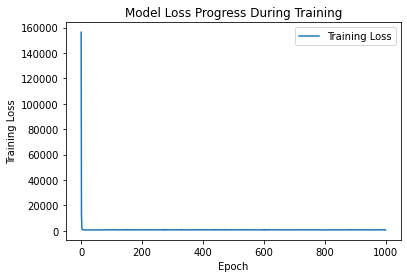

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [ ]:
model.get_weights()

[array([[ 2.602757  , -0.02938135,  0.07303488,  3.7514706 , -0.01132596,
          0.00924241,  0.08454601, -0.01031702, -0.1404895 , -0.15516943]],
       dtype=float32),
 array([ 4.6729007 , -0.0541377 , -0.18802863,  5.6249065 ,  0.23905937,
         0.03466853, -1.9694773 ,  0.03264828, -0.4441074 , -0.4193154 ],
       dtype=float32),
 array([[ 2.7187266e+00],
        [-3.2320593e-02],
        [-7.0882384e-03],
        [ 3.8022745e+00],
        [ 1.8224178e-04],
        [ 1.2249865e-02],
        [-2.9558982e-03],
        [-1.0523272e-02],
        [-1.1077304e-01],
        [-1.4916441e-01]], dtype=float32),
 array([10.74945], dtype=float32)]

In [ ]:
# Previsões com o modelo treinado
temp = 5
revenue = model.predict([temp])
print('Revenue Predictions Using Trained ANN =', revenue)

1/1 [==============================] - 0s 385ms/step
Revenue Predictions Using Trained ANN = [[151.85909]]


16/16 [==============================] - 0s 1ms/step


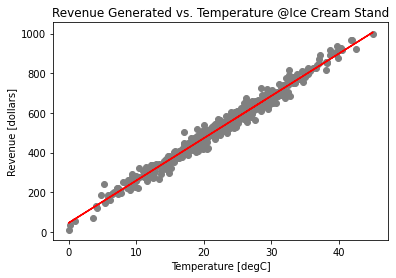

In [ ]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

# Etapa 7: Confirmar os resultados usando sklearn

In [ ]:
X_train.shape

(500,)

In [ ]:
X_train = X_train.values.reshape(-1,1)

In [ ]:
X_train.shape

(500, 1)

In [ ]:
y_train = y_train.values.reshape(-1,1)

In [ ]:
y_train.shape

(500, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.coef_

array([[21.44362551]])

In [ ]:
regressor.intercept_

array([44.83126709])

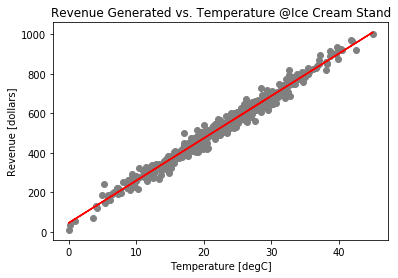

In [ ]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

In [ ]:
temp = 5
revenue = regressor.predict([[temp]])
print('Revenue Predictions Using Trained ANN =', revenue)

Revenue Predictions Using Trained ANN = [[152.04939464]]
